## Pandas Modeling Experimentation

In [17]:
import pandas as pd
import seaborn as sns
import time
import requests
import urllib
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
pd.set_option('display.max_rows', 500)

In [10]:
#load in dataframe
choco_df = pd.read_csv("chocolate_db_raw.csv") 
choco_df = choco_df.dropna()
choco_df = choco_df.reset_index(drop = True)

## Data Cleaning

### Fixing Ingredients and percent and categorizing

In [11]:
choco_df["num_ingr"] = [str(x).split("-")[0] for x in choco_df["Ingredients"]]

In [12]:
ingr = [str(x).split("-")[1].strip() for x in choco_df["Ingredients"]]
ingr = [x.split(",") for x in ingr]

In [13]:
for i in range(0, len(ingr)):
    for j in ingr[i]:
        choco_df.at[i,j] = 1

In [14]:
choco_df[['B', "S", "C", "L", "V", "Sa", "S*"]] = choco_df[['B', "S", "C", "L", "V", "Sa", "S*"]].fillna(0)

In [15]:
#changing percent to a float
choco_df['Cocoa Percent'] = choco_df['Cocoa Percent'].str.rstrip('%').astype('float') / 100.0

In [18]:
#getting Lat Long (do not run)
for i in range(0, len(choco_df["Country of Bean Origin"])):
    address = choco_df.at[i,"Country of Bean Origin"]
    url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'
    response = requests.get(url).json()
    try:
        choco_df.at[i,"Lon"] = response[0]["lon"]
        choco_df.at[i,"Lat"] = response[0]["lat"]
    except:
        choco_df.at[i,"Lon"] = None
        choco_df.at[i,"Lat"] = None
    time.sleep(0.1)

In [19]:
choco_df

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating,num_ingr,B,S,C,L,V,Sa,S*,Lon,Lat
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",0.76,"3- B,S,C","rich cocoa, fatty, bready",3.25,3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,35.7878438,-6.5247123
1,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",0.76,"3- B,S,C","cocoa, blackberry, full body",3.75,3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,46.4416422,-18.9249604
2,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",0.76,"3- B,S,C","cocoa, vegetal, savory",3.50,3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,-70.3028026,19.0974031
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",0.68,"3- B,S,C","chewy, off, rubbery",3.00,3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,179.0122737,-18.1239696
4,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",0.68,"3- B,S,C","milk brownie, macadamia,chewy",3.50,3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,78.6677428,22.3511148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496,1205,Zotter,Austria,2014,Blend,Raw,0.80,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75,4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,-0.1002445,51.5840921
2497,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",0.75,"3- B,S,C","strong nutty, marshmallow",3.75,3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,-72.9088133,4.099917
2498,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",0.75,"3- B,S,C","fatty, earthy, cocoa",3.00,3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,-0.1002445,51.5840921
2499,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,0.70,"3- B,S,C","fatty, mild nuts, mild fruit",3.25,3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,23.8222636,-2.9814344


In [20]:
#export to csv file
choco_df.to_csv("choco_df.csv")

In [21]:
choco_df = pd.read_csv("choco_df.csv") 

In [62]:
#create new Dataframe for modeling with dummy variables
choco_df_for_model = choco_df[["Cocoa Percent", "num_ingr",
                                                 "B", "S", "C", "L", "V", "Sa", "S*", "Lon", "Lat"]]
choco_df_for_model = pd.concat([choco_df_for_model, pd.get_dummies(choco_df["Country of Bean Origin"])],1)

/tmp/ipykernel_343/1826344578.py:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  choco_df_for_model = pd.concat([choco_df_for_model, pd.get_dummies(choco_df["Country of Bean Origin"])],1)


## Linear Regression Model

In [63]:
X, X_test, y, y_test = train_test_split(choco_df_for_model, 
                                        choco_df["Rating"], test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=0)

In [64]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train,y_train)

0.08571124103523375

In [65]:
lr.score(X_val, y_val)

0.020665221098175146

In [66]:
lr = LinearRegression()
lr.fit(X,y)
lr.score(X_test, y_test)

-2002743581977389.2

In [67]:
pd.DataFrame({"Names":lr.feature_names_in_, "Imp":lr.coef_})

,Names,Imp
0,Cocoa Percent,-9.889569e-01
1,num_ingr,-1.174647e+10
2,B,-4.025295e+10
3,S,1.174647e+10
4,C,1.174647e+10
5,L,1.174647e+10
6,V,1.174647e+10
7,Sa,1.174647e+10
8,S*,1.174647e+10
9,Lon,5.345974e+06


In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
prediction = lr.predict(X_train)
residual = (y_train - prediction)

Text(0.5, 0, 'Prediction')

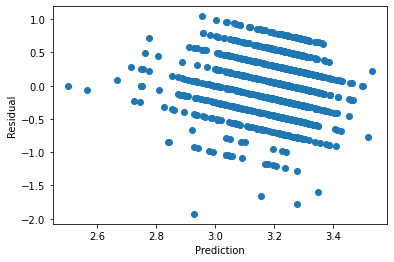

In [72]:
fig = plt.scatter(prediction, residual)
fig.axes.set_ylabel('Residual')
fig.axes.set_xlabel('Prediction') 

## Initial Random Forest Regressor

In [34]:
X, X_test, y, y_test = train_test_split(choco_df_for_model, 
                                        choco_df["Rating"], test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=0)

In [35]:
rfreg = RandomForestRegressor()
rfreg.fit(X_train, y_train)
rfreg.score(X_train,y_train)

0.49368330064357213

In [36]:
rfreg.score(X_val, y_val)

-0.05551613739068273

In [37]:
rfreg = RandomForestRegressor()
rfreg.fit(X,y)
rfreg.score(X_test, y_test)

-0.10142731566385055

In [38]:
feat_impt = pd.DataFrame({"Names":rfreg.feature_names_in_, "Imp":rfreg.feature_importances_})
feat_impt = feat_impt.sort_values(by = "Imp", ascending = False).reset_index(drop = True)
print(feat_impt)

                    Names       Imp
0           Cocoa Percent  0.317817
1                     Lat  0.121772
2                     Lon  0.103301
3                num_ingr  0.057884
4                       V  0.052728
5                       L  0.040700
6                       C  0.031952
7                    Peru  0.015036
8      Dominican Republic  0.014315
9               Venezuela  0.012240
10                      S  0.011578
11                  Ghana  0.011518
12               Tanzania  0.011483
13                Ecuador  0.011270
14                Jamaica  0.011064
15                     S*  0.010224
16            Puerto Rico  0.009313
17                 Brazil  0.008962
18              Nicaragua  0.008709
19                  Blend  0.008417
20             Costa Rica  0.007472
21                Bolivia  0.007359
22               Colombia  0.007117
23               Trinidad  0.007055
24               Sao Tome  0.006754
25                Grenada  0.006176
26                     Sa  0

In [39]:
# dummy for manufacturer
choco_df_for_model = pd.concat([choco_df_for_model, pd.get_dummies(choco_df["Company (Manufacturer)"])],1)

/tmp/ipykernel_343/1204902412.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  choco_df_for_model = pd.concat([choco_df_for_model, pd.get_dummies(choco_df["Company (Manufacturer)"])],1)


## Grid Search for Random Forest Regressor

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [41]:
X, X_test, y, y_test = train_test_split(choco_df_for_model, 
                                        choco_df["Rating"], test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=0)

In [42]:
rf_model = RandomForestRegressor()
params={"max_depth": range(5,20,5), "min_samples_leaf": range(1,15,5),
         "n_estimators":[200,400]}
model_names =  "rf_model"
parameters_list=[params]
model_log= "_rf"
scaler = StandardScaler()
Grid=GridSearchCV(estimator=rf_model, param_grid=parameters_list, scoring='r2',
                      n_jobs=-1, cv=3, verbose=3)
    
model=Grid.fit(X_train,y_train)
        
globals()['Grid%s' % model_log] =pd.DataFrame(Grid.cv_results_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


In [43]:
model.best_score_

0.08384662366591704

In [44]:
final_model= model.best_estimator_

In [45]:
final_model

RandomForestRegressor(max_depth=15, n_estimators=200)

In [46]:
rfreg2 = final_model
rfreg2.fit(X_train, y_train)
rfreg2.score(X_train,y_train)

0.40793075686592895

In [47]:
rfreg2.score(X_val, y_val)

0.09102280385806416

In [48]:
rfreg2 = final_model
rfreg2.fit(X,y)
rfreg2.score(X_test, y_test)

0.08737993877746708

In [49]:
feat_impt = pd.DataFrame({"Names":rfreg2.feature_names_in_, "Imp":rfreg2.feature_importances_})
feat_impt = feat_impt.sort_values(by = "Imp", ascending = False).reset_index(drop = True)
feat_impt.head(20)

,Names,Imp
0,Cocoa Percent,0.137786
1,V,0.071797
2,Lat,0.059252
3,Lon,0.050109
4,Soma,0.040324
5,Snake & Butterfly,0.022290
6,Valrhona,0.021521
7,Dolfin (Belcolade),0.017381
8,Neuhaus (Callebaut),0.016977
9,Bonnat,0.016950


## Grid Search for Extra Trees Regressor

In [50]:
from sklearn.ensemble import ExtraTreesRegressor

In [51]:
rf_model = ExtraTreesRegressor()
params={"max_depth": range(5,20,5), "min_samples_leaf": range(1,15,5),
         "n_estimators":[200,400]}
model_names =  "rf_model"
parameters_list=[params]
model_log= "_rf"
scaler = StandardScaler()
Grid=GridSearchCV(estimator=rf_model, param_grid=parameters_list, scoring='r2',
                      n_jobs=-1, cv=3, verbose=3)
    
model=Grid.fit(X_train,y_train)
        
globals()['Grid%s' % model_log] =pd.DataFrame(Grid.cv_results_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


In [52]:
model.best_score_

0.05861241265374306

In [53]:
final_model= model.best_estimator_

In [54]:
final_model

ExtraTreesRegressor(max_depth=10, min_samples_leaf=6, n_estimators=400)

In [55]:
exreg = final_model
exreg.fit(X_train, y_train)
exreg.score(X_train,y_train)

0.2076176313352197

In [56]:
exreg.score(X_val, y_val)

0.035214946335139885

In [57]:
exreg = final_model
exreg.fit(X,y)
exreg.score(X_test, y_test)

0.09858364379763285

In [58]:
feat_impt = pd.DataFrame({"Names":exreg.feature_names_in_, "Imp":exreg.feature_importances_})
feat_impt = feat_impt.sort_values(by = "Imp", ascending = False).reset_index(drop = True)
feat_impt.head(30)

,Names,Imp
0,V,0.188339
1,Soma,0.099600
2,Cocoa Percent,0.081167
3,S,0.048854
4,Valrhona,0.040796
5,Blend,0.037389
6,Pierre Marcolini,0.033385
7,Bonnat,0.033094
8,Idilio (Felchlin),0.032691
9,Zotter,0.031799


[CV 1/3] END max_depth=5, min_samples_leaf=1, n_estimators=400;, score=0.040 total time=   5.7s
[CV 1/3] END max_depth=10, min_samples_leaf=6, n_estimators=200;, score=0.049 total time=   4.7s
[CV 3/3] END max_depth=10, min_samples_leaf=11, n_estimators=400;, score=0.058 total time=   7.5s
[CV 3/3] END max_depth=15, min_samples_leaf=11, n_estimators=200;, score=0.050 total time=   3.5s
[CV 3/3] END max_depth=5, min_samples_leaf=1, n_estimators=200;, score=0.073 total time=   2.6s
[CV 1/3] END max_depth=5, min_samples_leaf=11, n_estimators=200;, score=0.020 total time=   2.5s
[CV 1/3] END max_depth=10, min_samples_leaf=1, n_estimators=400;, score=-0.003 total time=   8.7s
[CV 1/3] END max_depth=15, min_samples_leaf=1, n_estimators=400;, score=-0.026 total time=  12.0s
[CV 3/3] END max_depth=5, min_samples_leaf=1, n_estimators=200;, score=0.071 total time=   2.3s
[CV 3/3] END max_depth=5, min_samples_leaf=11, n_estimators=200;, score=0.071 total time=   2.1s
[CV 2/3] END max_depth=10, mi

[CV 2/3] END max_depth=5, min_samples_leaf=1, n_estimators=400;, score=0.065 total time=   4.6s
[CV 1/3] END max_depth=10, min_samples_leaf=1, n_estimators=400;, score=0.055 total time=   7.3s
[CV 3/3] END max_depth=15, min_samples_leaf=1, n_estimators=200;, score=0.099 total time=   4.7s
[CV 3/3] END max_depth=15, min_samples_leaf=6, n_estimators=400;, score=0.050 total time=   6.3s
[CV 2/3] END max_depth=5, min_samples_leaf=1, n_estimators=400;, score=0.014 total time=   5.1s
[CV 3/3] END max_depth=10, min_samples_leaf=1, n_estimators=200;, score=0.028 total time=   4.3s
[CV 1/3] END max_depth=10, min_samples_leaf=11, n_estimators=200;, score=0.026 total time=   3.9s
[CV 3/3] END max_depth=15, min_samples_leaf=1, n_estimators=200;, score=0.014 total time=   6.2s
[CV 3/3] END max_depth=15, min_samples_leaf=6, n_estimators=200;, score=0.081 total time=   4.1s
[CV 1/3] END max_depth=15, min_samples_leaf=11, n_estimators=400;, score=0.026 total time=   7.5s
